In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
df=pd.read_csv("C:/Users/LENOVO/Desktop/Jupiter/NPTEL_ML/california_housing_test.csv")
print(df)

      longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0       -122.05     37.37                27.0       3885.0           661.0   
1       -118.30     34.26                43.0       1510.0           310.0   
2       -117.81     33.78                27.0       3589.0           507.0   
3       -118.36     33.82                28.0         67.0            15.0   
4       -119.67     36.33                19.0       1241.0           244.0   
...         ...       ...                 ...          ...             ...   
2995    -119.86     34.42                23.0       1450.0           642.0   
2996    -118.14     34.06                27.0       5257.0          1082.0   
2997    -119.70     36.30                10.0        956.0           201.0   
2998    -117.12     34.10                40.0         96.0            14.0   
2999    -119.63     34.42                42.0       1765.0           263.0   

      population  households  median_income  median_house_value

In [68]:
corr_mat=df.corr(method="pearson")
corr_mat

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925017,-0.064203,0.049865,0.070869,0.111572,0.051062,-0.018701,-0.050662
latitude,-0.925017,1.000000,-0.025143,-0.039632,-0.068245,-0.117318,-0.068296,-0.072363,-0.138428
housing_median_age,-0.064203,-0.025143,1.000000,-0.367850,-0.323154,-0.299888,-0.305171,-0.144315,0.091409
total_rooms,0.049865,-0.039632,-0.367850,1.000000,0.937749,0.838867,0.914116,0.221249,0.160427
total_bedrooms,0.070869,-0.068245,-0.323154,0.937749,1.000000,0.856387,0.970758,0.024025,0.082279
population,0.111572,-0.117318,-0.299888,0.838867,0.856387,1.000000,0.895530,0.032361,-0.001192
households,0.051062,-0.068296,-0.305171,0.914116,0.970758,0.895530,1.000000,0.048625,0.100176
median_income,-0.018701,-0.072363,-0.144315,0.221249,0.024025,0.032361,0.048625,1.000000,0.672695
median_house_value,-0.050662,-0.138428,0.091409,0.160427,0.082279,-0.001192,0.100176,0.672695,1.000000


<Axes: >

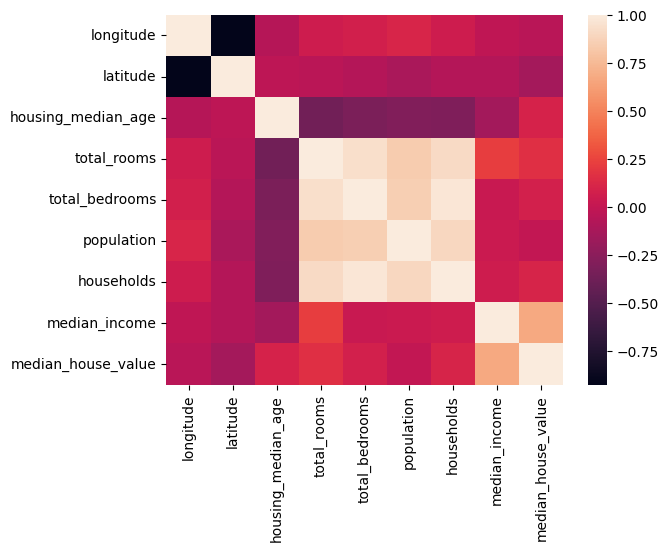

In [69]:
sns.heatmap(corr_mat)

In [70]:
df=df.drop(["housing_median_age","total_bedrooms"],axis=1,inplace=False)
print(df)

      longitude  latitude  total_rooms  population  households  median_income  \
0       -122.05     37.37       3885.0      1537.0       606.0         6.6085   
1       -118.30     34.26       1510.0       809.0       277.0         3.5990   
2       -117.81     33.78       3589.0      1484.0       495.0         5.7934   
3       -118.36     33.82         67.0        49.0        11.0         6.1359   
4       -119.67     36.33       1241.0       850.0       237.0         2.9375   
...         ...       ...          ...         ...         ...            ...   
2995    -119.86     34.42       1450.0      1258.0       607.0         1.1790   
2996    -118.14     34.06       5257.0      3496.0      1036.0         3.3906   
2997    -119.70     36.30        956.0       693.0       220.0         2.2895   
2998    -117.12     34.10         96.0        46.0        14.0         3.2708   
2999    -119.63     34.42       1765.0       753.0       260.0         8.5608   

      median_house_value  


In [71]:
df.describe()

,longitude,latitude,total_rooms,population,households,median_income,median_house_value
count,3000.000000,3000.00000,3000.000000,3000.000000,3000.00000,3000.000000,3000.00000
mean,-119.589200,35.63539,2599.578667,1402.798667,489.91200,3.807272,205846.27500
std,1.994936,2.12967,2155.593332,1030.543012,365.42271,1.854512,113119.68747
min,-124.180000,32.56000,6.000000,5.000000,2.00000,0.499900,22500.00000
25%,-121.810000,33.93000,1401.000000,780.000000,273.00000,2.544000,121200.00000
50%,-118.485000,34.27000,2106.000000,1155.000000,409.50000,3.487150,177650.00000
75%,-118.020000,37.69000,3129.000000,1742.750000,597.25000,4.656475,263975.00000
max,-114.490000,41.92000,30450.000000,11935.000000,4930.00000,15.000100,500001.00000


In [72]:
def detect_outliers(df, col_name, threshold=3):
    mean = df[col_name].mean()
    std_dev = df[col_name].std()
    z_scores = [(x - mean) / std_dev for x in df[col_name]]
    outlier_indices = [i for i, score in enumerate(z_scores) if abs(score) > threshold]
    return outlier_indices

In [73]:
outlier_ind=detect_outliers(df,"total_rooms",threshold=3)


In [74]:
df=df.drop(df.index[outlier_ind])

<Axes: ylabel='total_rooms'>

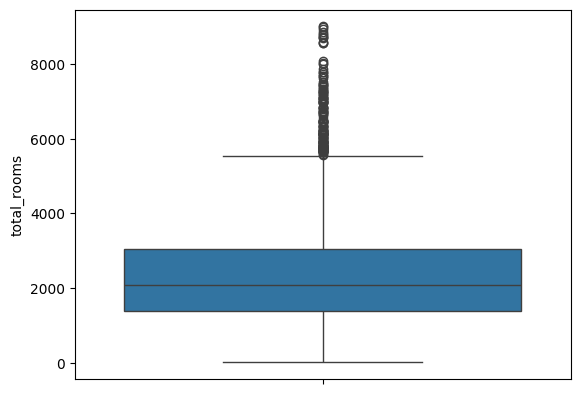

In [75]:
sns.boxplot(df["total_rooms"])


In [76]:
# outlier_ind=detect_outliers(df,"population",threshold=3)
# df=df.drop(df.index[outlier_ind])

In [77]:
# sns.boxplot(df["population"])

In [78]:
outlier_ind=detect_outliers(df,"median_house_value",threshold=3)
df=df.drop(df.index[outlier_ind])

<Axes: ylabel='median_house_value'>

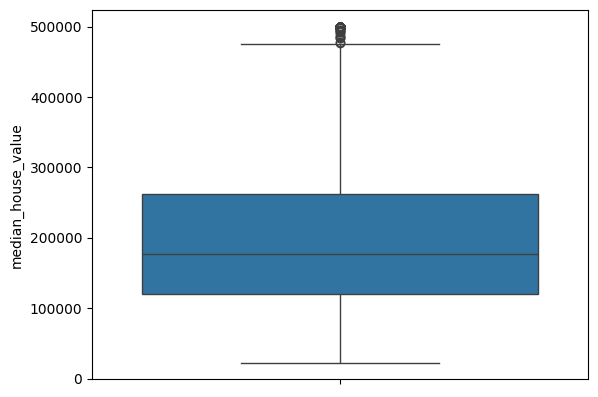

In [79]:
sns.boxplot(df["median_house_value"])

In [1]:
sns.scatterplot(data=df,x="total_rooms",y="median_house_value",hue="median_income")

NameError: name 'sns' is not defined

In [81]:
df.describe()

,longitude,latitude,total_rooms,population,households,median_income,median_house_value
count,2949.000000,2949.000000,2949.000000,2949.000000,2949.000000,2949.000000,2949.000000
mean,-119.606328,35.648457,2411.546965,1331.380129,462.577484,3.782559,204895.666328
std,1.992801,2.129992,1493.566992,837.806072,279.740452,1.845964,112742.551371
min,-124.180000,32.560000,6.000000,5.000000,2.000000,0.499900,22500.000000
25%,-121.830000,33.940000,1388.000000,774.000000,272.000000,2.537400,120400.000000
50%,-118.500000,34.280000,2085.000000,1143.000000,405.000000,3.458300,177000.000000
75%,-118.030000,37.700000,3057.000000,1702.000000,582.000000,4.625000,262300.000000
max,-114.490000,41.920000,9020.000000,11139.000000,2019.000000,15.000100,500001.000000


In [82]:
features = df.iloc[:,:-1]
predictors = df.iloc[:,-1:]

In [83]:
# Perform feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() #Used to perform standardization of the features
features_scaled = scaler.fit_transform(features)
features_scaled = pd.DataFrame(features_scaled, columns = features.columns)

<h4>Liniar Regression Model</h4>

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_scaled,predictors,test_size=0.2,random_state=42,shuffle=True)

In [85]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)

In [86]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2 = r2_score(y_train, y_pred_train)


In [87]:
print(mse_train,mae_train,r2,end=" ")

5162577315.777492 52216.77620582278 0.6037674111289792 

In [88]:

mse_test = mean_squared_error(y_test,y_pred)
mae_test = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)


In [89]:
print(mse_test, mae_test, r2, end=" ")

4838264171.025624 50019.208876442615 0.5758278891576794 

<h4>KNN Model</h4>

In [90]:
from sklearn.neighbors import KNeighborsRegressor
model = knn = KNeighborsRegressor(n_neighbors=7) #K=7
model.fit(X_train, y_train) 
y_pred_train = model.predict(X_train) 
y_pred = model.predict(X_test) 

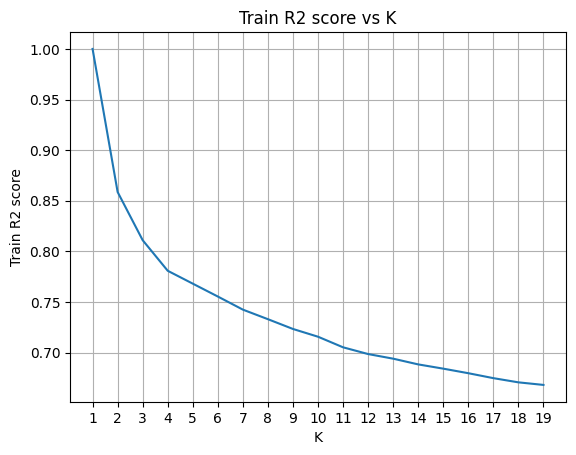

In [91]:
# Hyperparameter tuning
k_values = list(range(1, 20)) #k ranges between 1 and 19
model_best = KNeighborsRegressor() #Notice that the value of K is not inserted here
r2_values, mse_values = [], []
for k in k_values:
  model_best.set_params(n_neighbors=k)
  model_best.fit(X_train, y_train)
  y_pred_current = model_best.predict(X_train)
  r2_current = r2_score(y_train, y_pred_current)
  r2_values.append(r2_current)
  mse_current = mean_squared_error(y_train, y_pred_current)
  mse_values.append(mse_current)


# Plot the variation of R2 for various values of K
plt.plot(k_values, r2_values)
plt.title("Train R2 score vs K")
plt.xlabel("K")
plt.ylabel("Train R2 score")
plt.xticks(k_values)
plt.grid()
plt.show()

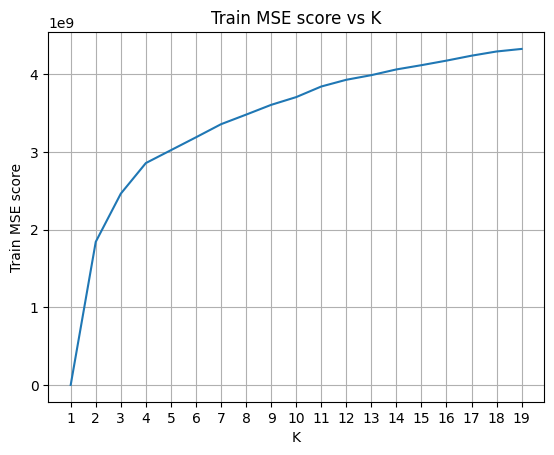

In [92]:
plt.plot(k_values, mse_values)
plt.title("Train MSE score vs K")
plt.xlabel("K")
plt.ylabel("Train MSE score")
plt.xticks(k_values)
plt.grid()
plt.show()

In [93]:
r2_best_train = r2_score(y_train, y_pred_train)
r2_best_test = r2_score(y_test, y_pred)
print('Train R2 score: ', r2_best_train)
print("Test R2 score: ",r2_best_test)

Train R2 score:  0.7424910834632039
Test R2 score:  0.6254994184709306
